# Import necessary libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import numpy as np
from collections import Counter
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Downloading Dataset

In [ ]:
file_id = '1SuB4gzh9_mcMp6FG8P1HpKENxLlIEnRI'
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download the dataset
output = 'concrete_dataset.xlsx'
gdown.download(download_link, output, quiet=False)
df = pd.read_excel(output, header=1)

# Display the first few rows of the dataset
df.head()

Downloading...
From: https://drive.google.com/uc?id=1SuB4gzh9_mcMp6FG8P1HpKENxLlIEnRI
To: /content/concrete_dataset.xlsx
100%|██████████| 800k/800k [00:00<00:00, 94.5MB/s]


,Mix #,Cement,Gypsum,SCM 1,Water,Fine Agg.,Cor. Agg.,T. Agg./Bin.,fu (Mpa),Carbon Embodiment
0,1,0.666667,0.00,0.000,0.333333,0.666667,0.0,2.0,55.982813,0.197206
1,2,0.459667,0.01,0.197,0.333333,0.666667,0.0,2.0,56.598958,0.159421
2,3,0.459667,0.01,0.197,0.333333,0.666667,0.0,2.0,46.696875,0.159421
3,4,0.459667,0.01,0.197,0.333333,0.666667,0.0,2.0,50.585938,0.159421
4,5,0.459667,0.01,0.197,0.333333,0.666667,0.0,2.0,40.821875,0.159421


# Performing Random Forest for Feature sSelection

Feature:
['Cement ', 'Gypsum ', 'SCM 1', 'Water ', 'Fine Agg.', 'Cor. Agg.', 'T. Agg./Bin.']

Target: fu (Mpa)

Mean Squared Error: 73.90389602231538


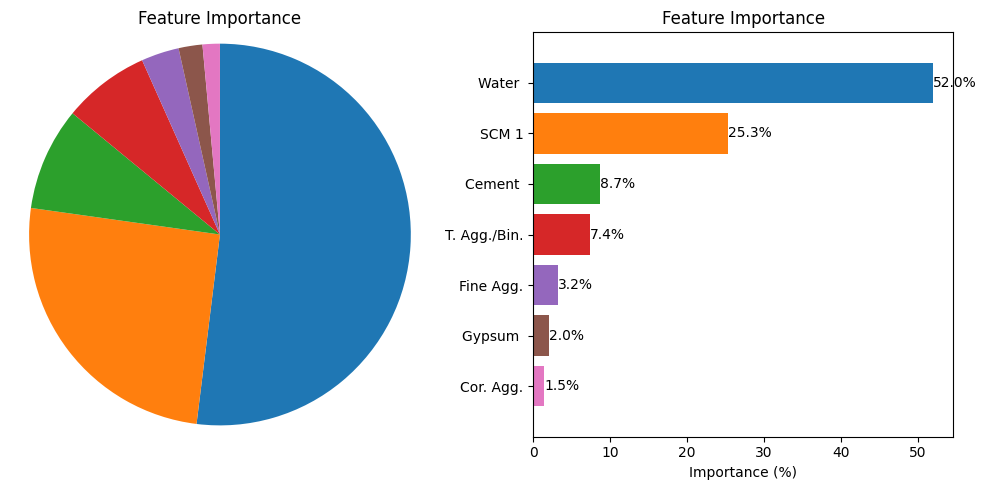

In [ ]:
# ----------------------------------------
# Data Preparation: Feature Selection and Target Variable
# ----------------------------------------
# Features based on the columns we provided
# These are the independent variables that will be used to predict the target variable
features = df.columns[1:-2].tolist()
print(f'Feature:\n{features}\n')
# Target variable (28-day compressive strength, 'fu (Mpa)')
# This is the dependent variable we want to predict using the selected features
target_column = df.columns[-2]
print(f'Target: {target_column}\n')

# Create a DataFrame with only the selected columns (features + target), and drop rows with missing values
data = df[features + [target_column]].dropna()

# Split the data into features (X) and target (y)
# X: All the selected columns (independent variables)
# y: The target column (dependent variable)
X = data.drop(columns=[target_column])  # Independent variables
y = data[target_column]  # Dependent variable (target)

# ----------------------------------------
# Train-Test Split: Dividing the Dataset
# ----------------------------------------

# Split the dataset into training and testing sets
# 80% of the data will be used for training, 20% for testing
# random_state ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------
# Initialize and Train the Random Forest Model
# ----------------------------------------

# Initialize the RandomForestRegressor model
# n_estimators: Number of trees in the forest
# random_state: Ensures reproducibility
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model (fit the model) using the training data
rf.fit(X_train, y_train)

# ----------------------------------------
# Model Prediction and Evaluation
# ----------------------------------------

# Make predictions using the test set (unseen data)
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
# Lower MSE means better model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ----------------------------------------
# Feature Importance Calculation
# ----------------------------------------

# Extract feature importance from the trained Random Forest model
# This tells us how much each feature contributes to the predictions
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importance in a structured way
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': feature_importances  # Corresponding importance values
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# ----------------------------------------
# Visualization: Plotting Feature Importances in a Pie Chart
# ----------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart
wedges, texts, autotexts = ax1.pie(importance_df['Importance'],
                                   startangle=90,
                                   counterclock=False,
                                   autopct='%1.1f%%',
                                   pctdistance=0.85)

# Remove labels from pie slices
for autotext in autotexts:
    autotext.set_visible(False)

# Ensure the pie chart is circular
ax1.axis('equal')
ax1.set_title('Feature Importance')

# Extract colors from pie wedges
pie_colors = [wedge.get_facecolor() for wedge in wedges]

# Plot sorted bar chart with matching colors
bars = ax2.barh(importance_df['Feature'],
                importance_df['Importance'] * 100,  # Convert to percentage
                color=pie_colors)

# Customize bar chart
ax2.set_xlabel('Importance (%)')
ax2.set_ylim(-1, len(importance_df))  # Add some padding
ax2.invert_yaxis()  # Invert y-axis to match pie chart order

# Add percentage labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%',
             ha='left', va='center')
plt.title('Feature Importance')
# Adjust layout and display
plt.tight_layout()
plt.show()


#Performing Linear Regression Based on Top N Features


Top 4 features:
 ['Water ' 'SCM 1' 'T. Agg./Bin.' 'Fine Agg.']

Mean Squared Error using Top 4 Features (with scaling): 100.42118730989023
R² Score using Top 4 Features (with scaling): 0.6228

Coefficients for the Top Features (with Standardization):
        Feature  Coefficient
0        Water    -13.391745
1         SCM 1    -2.993541
2  T. Agg./Bin.    -1.379732
3     Fine Agg.     2.891460

Equation of the Fitted Linear Regression Model (with Standardization):
y = 51.1117 - 13.3917 * (Standardized Water ) - 2.9935 * (Standardized SCM 1) - 1.3797 * (Standardized T. Agg./Bin.) + 2.8915 * (Standardized Fine Agg.)

Coefficients for the Top Features (Non-Standardized):
        Feature  Coefficient (Non-Standardized)
0        Water                      -273.652070
1         SCM 1                      -30.448113
2  T. Agg./Bin.                       -2.021410
3     Fine Agg.                       27.173483

Equation of the Fitted Linear Regression Model (Non-Standardized):
y = 128.1383 - 

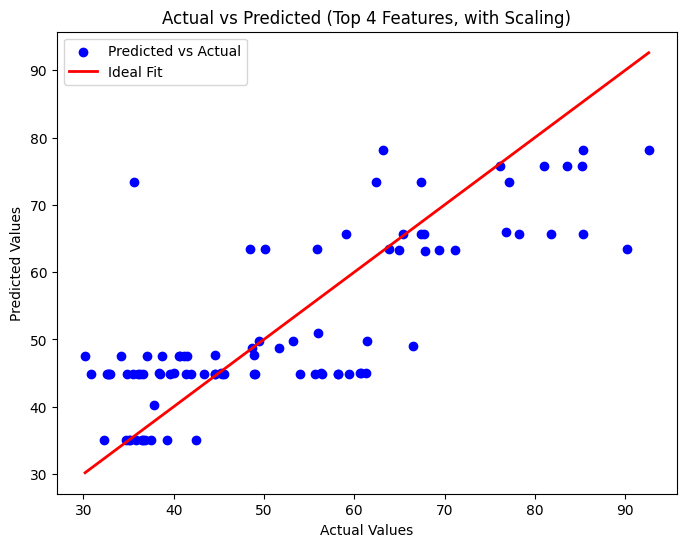

In [ ]:
# Assume the top N features have already been determined by the feature importance
N = 4
top_features = importance_df['Feature'].head(N).values
print(f"\nTop {N} features:\n", top_features)

# ----------------------------------------
# Standardization of Top N Features
# ----------------------------------------

# Use the top N features for training and testing
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# ----------------------------------------
# Linear Regression Based on Top N Features (With Scaling)
# ----------------------------------------

# Initialize and train a Linear Regression model using the scaled top N features
lr = LinearRegression()
lr.fit(X_train_top_scaled, y_train)

# Make predictions using the test set with the scaled top N features
y_pred_top = lr.predict(X_test_top_scaled)

# ----------------------------------------
# Model Evaluation: MSE and R² Score
# ----------------------------------------

# Calculate Mean Squared Error (MSE)
mse_top = mean_squared_error(y_test, y_pred_top)
print(f'\nMean Squared Error using Top {N} Features (with scaling): {mse_top}')

# Calculate R² Score
r2_top = r2_score(y_test, y_pred_top)
print(f'R² Score using Top {N} Features (with scaling): {r2_top:.4f}')

# ----------------------------------------
# Print the Linear Regression Model Equation (With Scaling)
# ----------------------------------------

# Print the intercept
intercept = lr.intercept_

# Print Coefficients of the Linear Regression Model
coefficients = lr.coef_

# Create a DataFrame for easy viewing of feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': coefficients
})

# Print the coefficients for the scaled model
print("\nCoefficients for the Top Features (with Standardization):")
print(coeff_df)

# Print the equation of the fitted linear regression model (with Standardization)
equation = f'y = {intercept:.4f}'  # Start with the intercept

# Add each feature and its corresponding coefficient to the equation string
for feature, coef in zip(top_features, coefficients):
    sign = '+' if coef >= 0 else '-'  # Handle positive and negative signs
    equation += f' {sign} {abs(coef):.4f} * (Standardized {feature})'

# Print the full regression equation
print("\nEquation of the Fitted Linear Regression Model (with Standardization):")
print(equation)

# ----------------------------------------
# Converting Coefficients to Original Scale (Non-Standardized)
# ----------------------------------------

# Recover the coefficients for non-standardized features
# To convert back: coef_original = coef_standardized / (std of the feature)
coef_non_standardized = lr.coef_ / scaler.scale_

# Adjust the intercept: intercept_original = intercept_standardized - sum(coef_standardized * mean of each feature / std of feature)
intercept_non_standardized = lr.intercept_ - sum((lr.coef_ * scaler.mean_) / scaler.scale_)

# Create a DataFrame for non-standardized coefficients
coeff_non_standard_df = pd.DataFrame({
    'Feature': top_features,
    'Coefficient (Non-Standardized)': coef_non_standardized
})

# Print the coefficients for the non-standardized model
print("\nCoefficients for the Top Features (Non-Standardized):")
print(coeff_non_standard_df)

# Print the equation of the fitted linear regression model (Non-Standardized)
equation_non_standard = f'y = {intercept_non_standardized:.4f}'  # Start with the non-standardized intercept

# Add each feature and its corresponding coefficient to the equation string
for feature, coef in zip(top_features, coef_non_standardized):
    sign = '+' if coef >= 0 else '-'  # Handle positive and negative signs
    equation_non_standard += f' {sign} {abs(coef):.4f} * ({feature})'

# Print the full regression equation (non-standardized)
print("\nEquation of the Fitted Linear Regression Model (Non-Standardized):")
print(equation_non_standard)

# ----------------------------------------
# Plot Actual vs Predicted Results
# ----------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_top, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label="Ideal Fit")
plt.title(f"Actual vs Predicted (Top {N} Features, with Scaling)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


# Gradient Boosting Feature Importance

Feature:
['Cement ', 'Gypsum ', 'SCM 1', 'Water ', 'Fine Agg.', 'Cor. Agg.', 'T. Agg./Bin.']

Target: fu (Mpa)

Mean Squared Error: 73.88572573801332


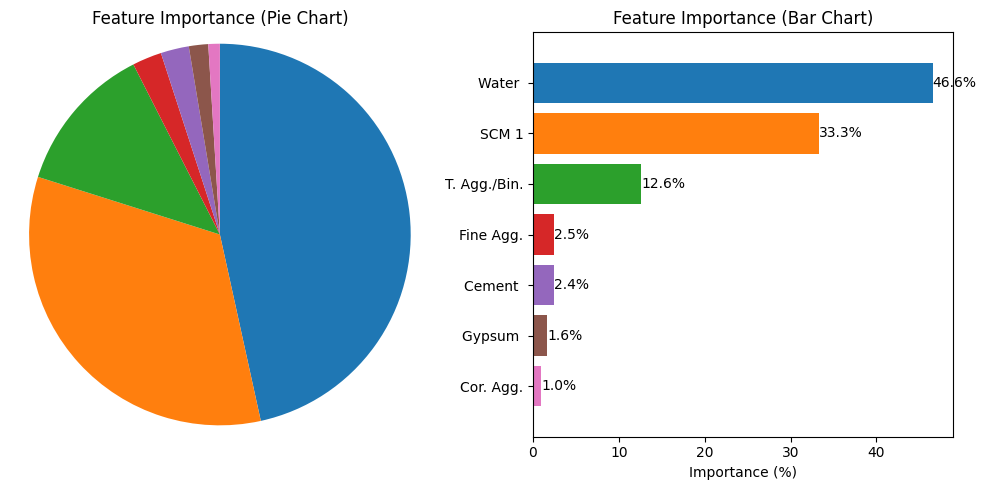

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ----------------------------------------
# Data Preparation: Feature Selection and Target Variable
# ----------------------------------------
# Features based on the columns we provided
# These are the independent variables that will be used to predict the target variable
features = df.columns[1:-2].tolist()
print(f'Feature:\n{features}\n')
# Target variable (28-day compressive strength, 'fu (Mpa)')
# This is the dependent variable we want to predict using the selected features
target_column = df.columns[-2]
print(f'Target: {target_column}\n')

# Create a DataFrame with only the selected columns (features + target), and drop rows with missing values
data = df[features + [target_column]].dropna()

# Split the data into features (X) and target (y)
X = data[features]  # Independent variables
y = data[target_column]  # Dependent variable

# ----------------------------------------
# Train-Test Split: Dividing the Dataset
# ----------------------------------------

# Split the dataset into training and testing sets
# 80% of the data will be used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------
# Initialize and Train the Gradient Boosting Model
# ----------------------------------------

# Initialize the GradientBoostingRegressor model
# n_estimators: Number of boosting stages (trees)
# learning_rate: Step size of the learning process
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model (fit the model) using the training data
gbr.fit(X_train, y_train)

# ----------------------------------------
# Model Prediction and Evaluation
# ----------------------------------------

# Make predictions using the test set (unseen data)
y_pred = gbr.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ----------------------------------------
# Feature Importance Calculation
# ----------------------------------------

# Extract feature importance from the trained Gradient Boosting model
feature_importances = gbr.feature_importances_

# Create a DataFrame to display feature importance in a structured way
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': feature_importances  # Corresponding importance values
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# ----------------------------------------
# Visualization: Plotting Feature Importances in a Pie Chart and Bar Chart
# ----------------------------------------

# Create a subplot with two plots: Pie chart and Bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart of feature importances
wedges, texts, autotexts = ax1.pie(importance_df['Importance'],
                                   startangle=90,
                                   counterclock=False,
                                   autopct='%1.1f%%',
                                   pctdistance=0.85)

# Remove labels from pie slices
for autotext in autotexts:
    autotext.set_visible(False)

# Ensure the pie chart is circular
ax1.axis('equal')
ax1.set_title('Feature Importance (Pie Chart)')

# Extract colors from pie wedges
pie_colors = [wedge.get_facecolor() for wedge in wedges]

# Plot bar chart of sorted feature importances with matching pie chart colors
bars = ax2.barh(importance_df['Feature'],
                importance_df['Importance'] * 100,  # Convert to percentage
                color=pie_colors)

# Customize bar chart
ax2.set_xlabel('Importance (%)')
ax2.set_ylim(-1, len(importance_df))  # Add some padding
ax2.invert_yaxis()  # Invert y-axis to match pie chart order

# Add percentage labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%',
             ha='left', va='center')

# Title and layout adjustment
ax2.set_title('Feature Importance (Bar Chart)')
plt.tight_layout()
plt.show()



# XGBoost Feature Importance

Features:
['Cement ', 'Gypsum ', 'SCM 1', 'Water ', 'Fine Agg.', 'Cor. Agg.', 'T. Agg./Bin.']

Target: fu (Mpa)

Mean Squared Error: 73.87868231966542


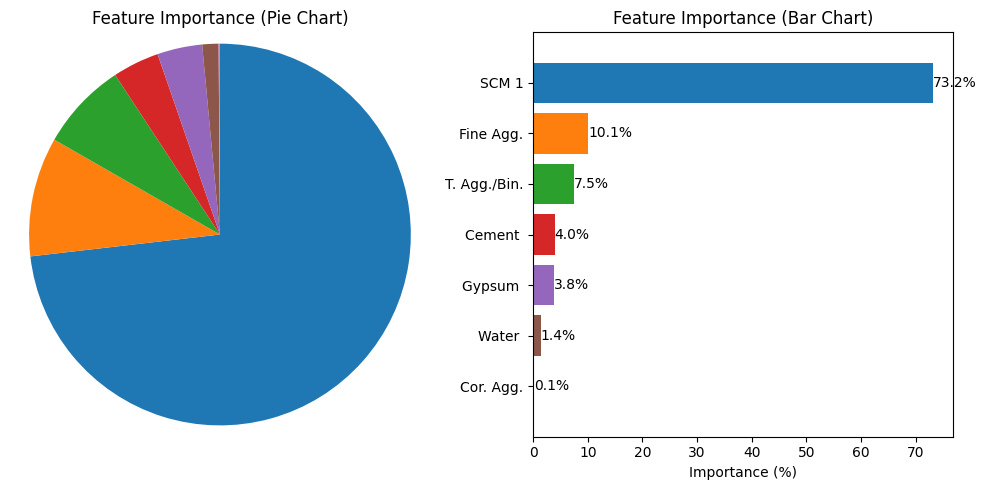

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb  # Importing XGBoost

# ----------------------------------------
# Data Preparation: Feature Selection and Target Variable
# ----------------------------------------
# Features based on the columns we provided
# These are the independent variables that will be used to predict the target variable
features = df.columns[1:-2].tolist()
print(f'Features:\n{features}\n')

# Target variable (28-day compressive strength, 'fu (Mpa)')
# This is the dependent variable we want to predict using the selected features
target_column = df.columns[-2]
print(f'Target: {target_column}\n')

# Create a DataFrame with only the selected columns (features + target), and drop rows with missing values
data = df[features + [target_column]].dropna()

# Split the data into features (X) and target (y)
X = data[features]  # Independent variables
y = data[target_column]  # Dependent variable

# ----------------------------------------
# Train-Test Split: Dividing the Dataset
# ----------------------------------------

# Split the dataset into training and testing sets
# 80% of the data will be used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------
# Initialize and Train the XGBoost Model
# ----------------------------------------

# Initialize the XGBRegressor model
xgbr = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

# Train the model (fit the model) using the training data
xgbr.fit(X_train, y_train)

# ----------------------------------------
# Model Prediction and Evaluation
# ----------------------------------------

# Make predictions using the test set (unseen data)
y_pred = xgbr.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ----------------------------------------
# Feature Importance Calculation
# ----------------------------------------

# Extract feature importance from the trained XGBoost model
feature_importances = xgbr.feature_importances_

# Create a DataFrame to display feature importance in a structured way
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': feature_importances  # Corresponding importance values
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# ----------------------------------------
# Visualization: Plotting Feature Importances in a Pie Chart and Bar Chart
# ----------------------------------------

# Create a subplot with two plots: Pie chart and Bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart of feature importances
wedges, texts, autotexts = ax1.pie(importance_df['Importance'],
                                   startangle=90,
                                   counterclock=False,
                                   autopct='%1.1f%%',
                                   pctdistance=0.85)

# Remove labels from pie slices
for autotext in autotexts:
    autotext.set_visible(False)

# Ensure the pie chart is circular
ax1.axis('equal')
ax1.set_title('Feature Importance (Pie Chart)')

# Extract colors from pie wedges
pie_colors = [wedge.get_facecolor() for wedge in wedges]

# Plot bar chart of sorted feature importances with matching pie chart colors
bars = ax2.barh(importance_df['Feature'],
                importance_df['Importance'] * 100,  # Convert to percentage
                color=pie_colors)

# Customize bar chart
ax2.set_xlabel('Importance (%)')
ax2.set_ylim(-1, len(importance_df))  # Add some padding
ax2.invert_yaxis()  # Invert y-axis to match pie chart order

# Add percentage labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%',
             ha='left', va='center')

# Title and layout adjustment
ax2.set_title('Feature Importance (Bar Chart)')
plt.tight_layout()
plt.show()
